In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine

#### Соединение с базой данных MySQL

In [94]:
# Укажите параметры соединения с базой данных MySQL
db_host = '127.0.0.1'
db_user = 'root'
db_password = 'Vikakashley080404'
db_name = 'homeassistant'

# Формируем строку подключения
connection_str = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Создаем соединение с базой данных
engine = create_engine(connection_str)

# Укажите ваш SQL-запрос
sql_query = 'SELECT * FROM states'

# Читаем данные из MySQL и загружаем их в DataFrame
df = pd.read_sql(sql_query, engine)

# Выводим DataFrame
print(df)


         state_id                                          entity_id  \
0          991389        sensor.wireless_router_archer_c7_b_received   
1          991390            sensor.wireless_router_archer_c7_b_sent   
2          991391  sensor.wireless_router_archer_c7_packets_received   
3          991392      sensor.wireless_router_archer_c7_packets_sent   
4          991393  sensor.wireless_router_archer_c7_packets_s_rec...   
...           ...                                                ...   
1293675   2285064    sensor.wireless_router_archer_c7_kib_s_received   
1293676   2285065        sensor.wireless_router_archer_c7_kib_s_sent   
1293677   2285066  sensor.wireless_router_archer_c7_packets_s_rec...   
1293678   2285067    sensor.wireless_router_archer_c7_packets_s_sent   
1293679   2285068                                            sun.sun   

                 state attributes event_id               last_changed  \
0             88899264       None     None                    

#### Вывод датчиков

In [95]:
unique_entity_ids = df['entity_id'].unique()
print(unique_entity_ids)

['sensor.wireless_router_archer_c7_b_received'
 'sensor.wireless_router_archer_c7_b_sent'
 'sensor.wireless_router_archer_c7_packets_received'
 'sensor.wireless_router_archer_c7_packets_sent'
 'sensor.wireless_router_archer_c7_packets_s_received'
 'sensor.wireless_router_archer_c7_packets_s_sent'
 'sensor.illuminance_0xc46e7baa8a32'
 'sensor.wireless_router_archer_c7_kib_s_received'
 'sensor.wireless_router_archer_c7_kib_s_sent' 'sun.sun'
 'sensor.datchik_vlazhnosti_i_temperatury_temperature'
 'sensor.datchik_vlazhnosti_i_temperatury_humidity'
 'sensor.datchik_vlazhnosti_i_temperatury_pressure'
 'sensor.0x00158d00054be1d4_temperature'
 'sensor.0x00158d00054be1d4_humidity' 'sensor.0x00158d00054be1d4_pressure'
 'binary_sensor.datchik_dvizheniia_occupancy' 'binary_sensor.okno_contact'
 'device_tracker.maxvi' 'device_tracker.redmi_5_plus'
 'device_tracker.huawei_p50' 'binary_sensor.otkryvanie_dverei_contact'
 'update.home_assistant_core_update' 'device_tracker.tm_d328'
 'update.home_assist

#### Предварительный анализ и очистка данных

*Вывод примерных данных для датчика давления sensor.0x00158d00054be1d4_pressure*

In [96]:
pressure1_data = df[df['entity_id'] == 'sensor.0x00158d00054be1d4_pressure']
print("Количество записей для датчика давления:", len(pressure1_data))
print("Пример данных для датчика давления:")
print(pressure1_data.head())

Количество записей для датчика давления: 2927
Пример данных для датчика давления:
      state_id                           entity_id  state attributes event_id  \
249     991638  sensor.0x00158d00054be1d4_pressure  997.3       None     None   
882     992271  sensor.0x00158d00054be1d4_pressure  997.5       None     None   
1278    992667  sensor.0x00158d00054be1d4_pressure  997.2       None     None   
2148    993537  sensor.0x00158d00054be1d4_pressure  997.4       None     None   
2455    993844  sensor.0x00158d00054be1d4_pressure  997.6       None     None   

     last_changed               last_updated  old_state_id  attributes_id  \
249           NaT 2022-08-29 01:30:44.005848           NaN             23   
882           NaT 2022-08-29 02:14:01.103577      991638.0             23   
1278          NaT 2022-08-29 02:40:46.023119      992271.0             23   
2148          NaT 2022-08-29 03:40:15.767460      992667.0             23   
2455          NaT 2022-08-29 04:00:59.303119  

*Вывод информации о количественных характеристиках датасета*

In [97]:
print("Информация о данных:")
print(pressure1_data.info())

# Вывод статистики по количественным признакам
print("Описательная статистика для количественных характеристик:")
print(pressure1_data.describe())

# Проверка на наличие отсутствующих значений
print("Отсутствующие значения:")
print(pressure1_data.isnull().sum())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 249 to 1292772
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state_id           2927 non-null   int64         
 1   entity_id          2927 non-null   object        
 2   state              2927 non-null   object        
 3   attributes         0 non-null      object        
 4   event_id           0 non-null      object        
 5   last_changed       0 non-null      datetime64[ns]
 6   last_updated       2927 non-null   datetime64[ns]
 7   old_state_id       2922 non-null   float64       
 8   attributes_id      2927 non-null   int64         
 9   context_id         2927 non-null   object        
 10  context_user_id    0 non-null      object        
 11  context_parent_id  0 non-null      object        
 12  origin_idx         2927 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3)

*Очистка данных от нулевых значений*

In [98]:
df1_cleaned = pressure1_data.dropna(axis=1, how='all')
df1_cleaned = df1_cleaned.drop(columns=['origin_idx'], axis=1)

*Иллюстрация структуры данных*

In [99]:
df1_cleaned.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
249,991638,sensor.0x00158d00054be1d4_pressure,997.3,2022-08-29 01:30:44.005848,NaN,23,01GBKKHVD5QF0FJ7HKEJR8JK9H
882,992271,sensor.0x00158d00054be1d4_pressure,997.5,2022-08-29 02:14:01.103577,991638.0,23,01GBKP13MF12FNJ0CQA77N41HN
1278,992667,sensor.0x00158d00054be1d4_pressure,997.2,2022-08-29 02:40:46.023119,992271.0,23,01GBKQJ2Y7GCSTD44WQED3E4X7
2148,993537,sensor.0x00158d00054be1d4_pressure,997.4,2022-08-29 03:40:15.767460,992667.0,23,01GBKTZ10QVV3J561HJTY5N26C
2455,993844,sensor.0x00158d00054be1d4_pressure,997.6,2022-08-29 04:00:59.303119,993537.0,23,01GBKW4ZD7AW5G62RMND0WNX4T


#### Преобразование атрибутов в числовой признак

In [100]:
df1_cleaned['last_updated'] = pd.to_datetime(df1_cleaned['last_updated'])
df1_cleaned['state'] = pd.to_numeric(df1_cleaned['state'], errors='coerce')
df1_cleaned['month'] = df1_cleaned['last_updated'].dt.month
df1_cleaned['day'] = df1_cleaned['last_updated'].dt.day
df1_cleaned['time_hours'] = df1_cleaned['last_updated'].dt.hour + df1_cleaned['last_updated'].dt.minute / 60


#### Описательный анализ данных
* определение шкалы измерения каждого признака;
* выявление аномальных значений;
* визуализация распределения каждого признака;
* построение кореллограмм и совместных распределений каждого признака с целевой переменной;
* выявление коррелированных признаков и признаков, не несущих информации для данной задачи.

C:\Users\37529\AppData\Local\Temp\ipykernel_14804\3742754966.py:13: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  print(f"{column} - Шкала измерения: {('Номинальная', 'Порядковая', 'Интервальная', 'Количественная')[pd.api.types.is_categorical_dtype(df1_cleaned[column]) + 2]}")


state_id - Шкала измерения: Интервальная
entity_id - Шкала измерения: Номинальная
state - Шкала измерения: Количественная
last_updated - Шкала измерения: Неопределенная
old_state_id - Шкала измерения: Количественная
context_id - Шкала измерения: Номинальная
month - Шкала измерения: Интервальная
day - Шкала измерения: Интервальная
time_hours - Шкала измерения: Количественная
Аномальные значения для state:
675028    984.0
676131    984.0
676204    984.1
676803    983.7
677223    983.8
678582    984.0
679107    984.1
Name: state, dtype: float64


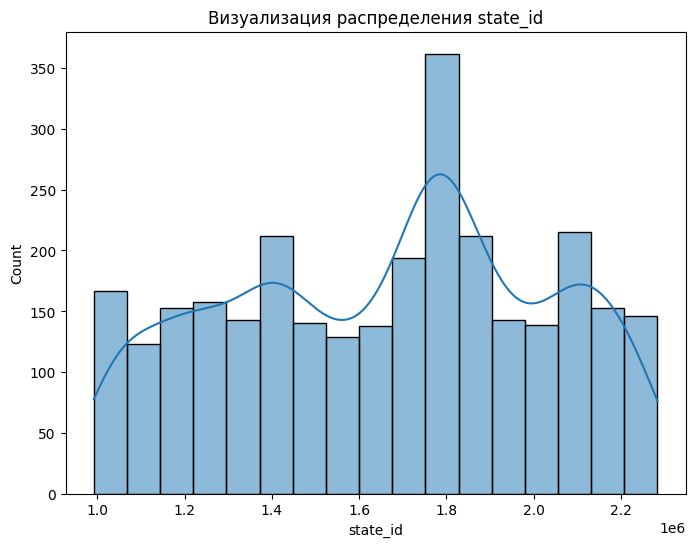

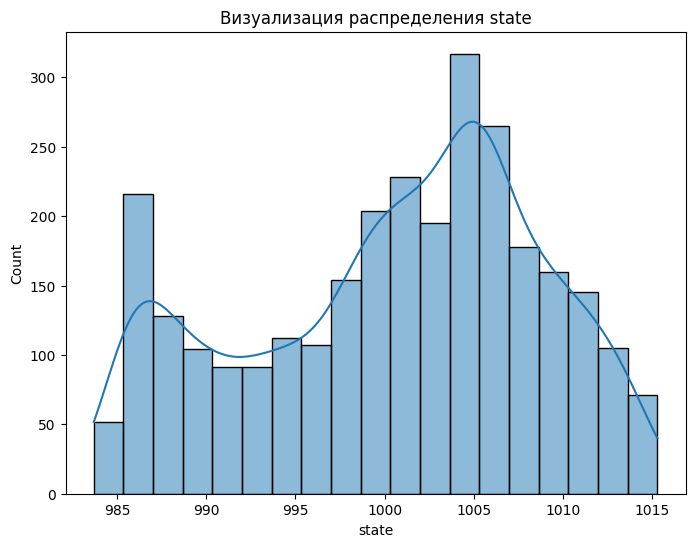

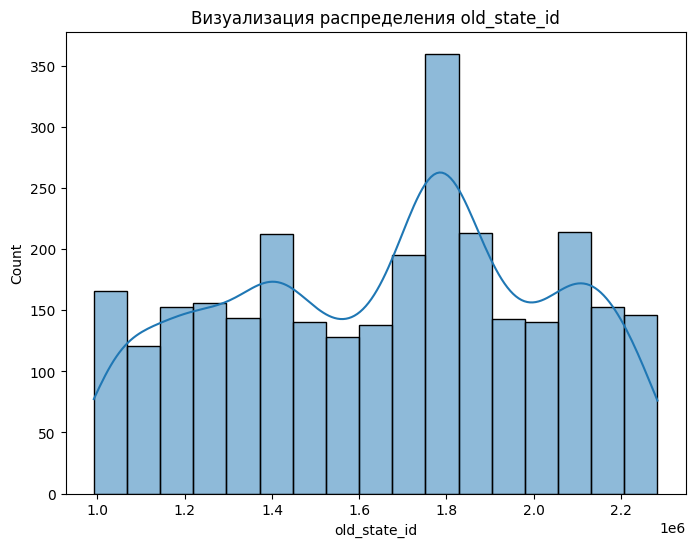

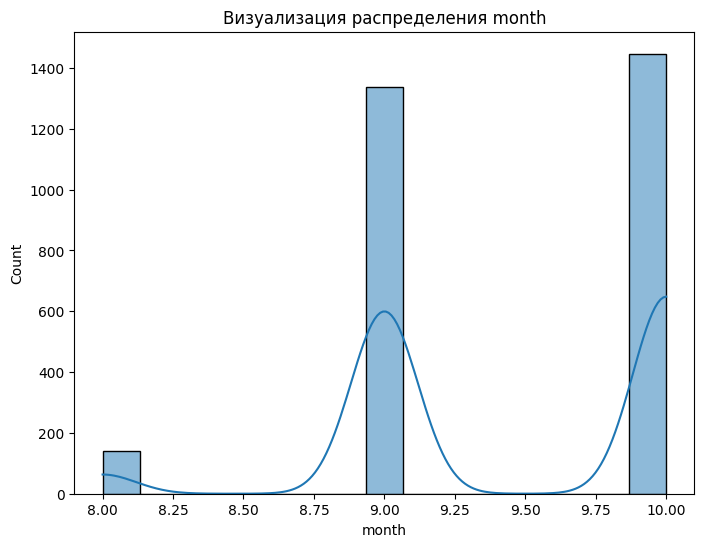

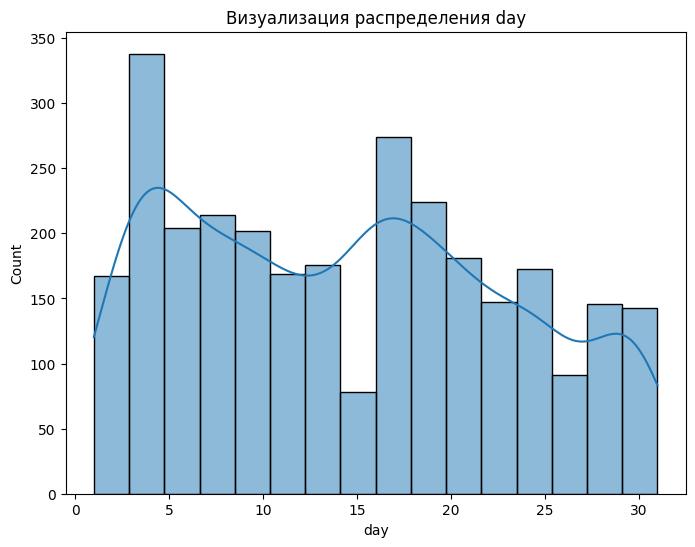

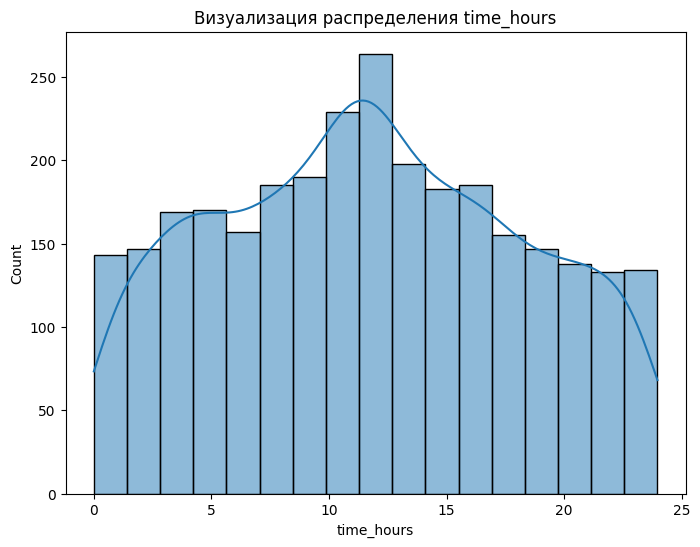

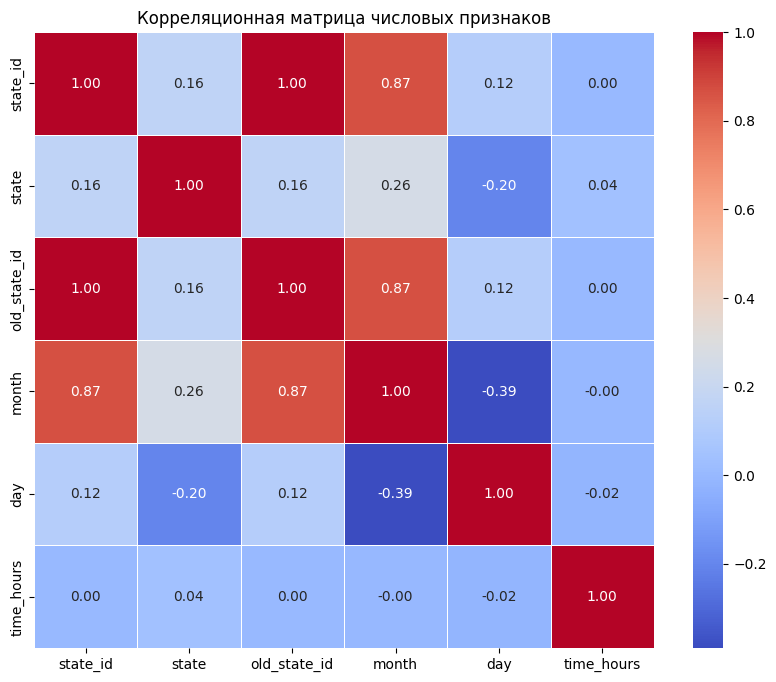

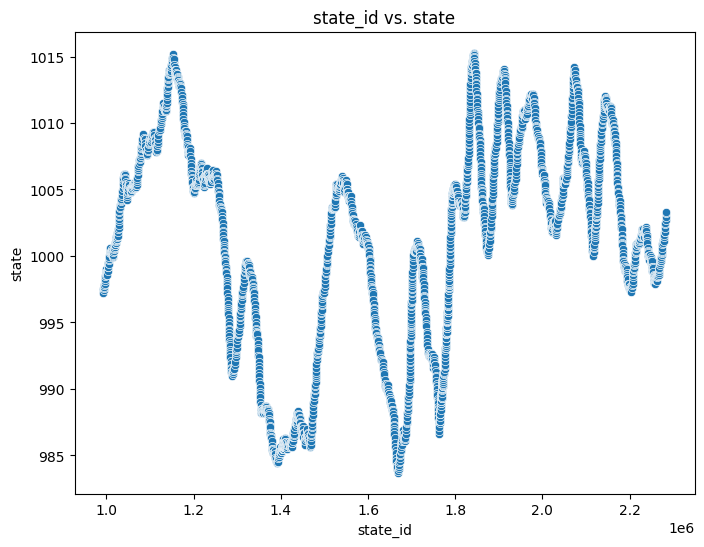

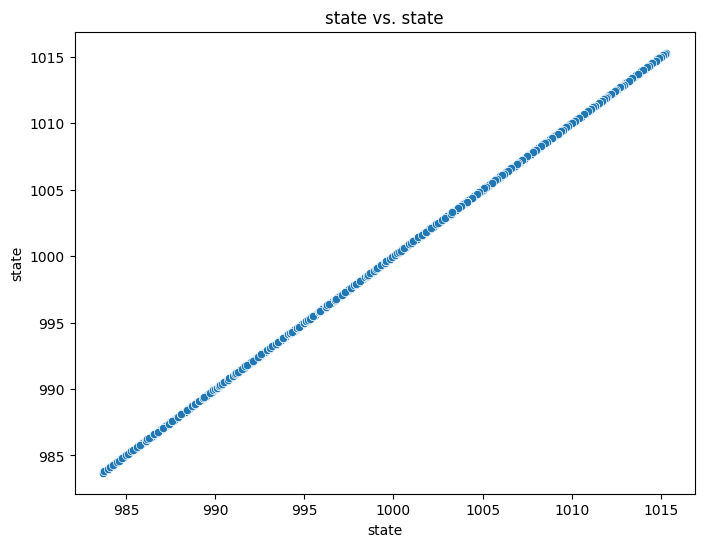

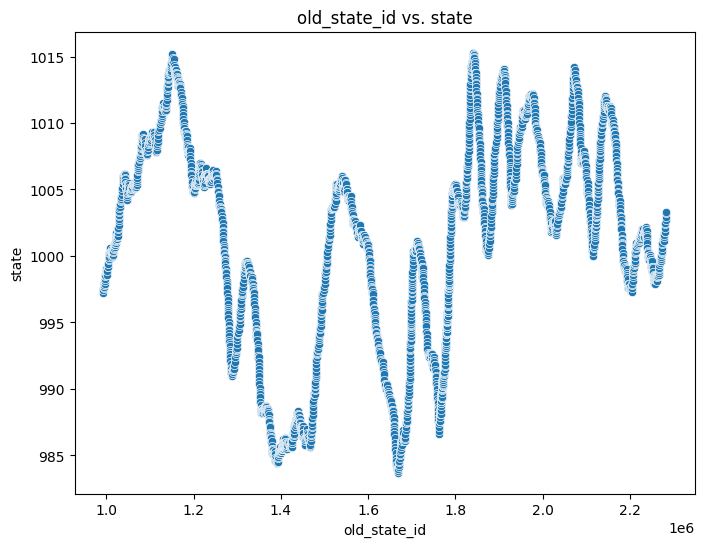

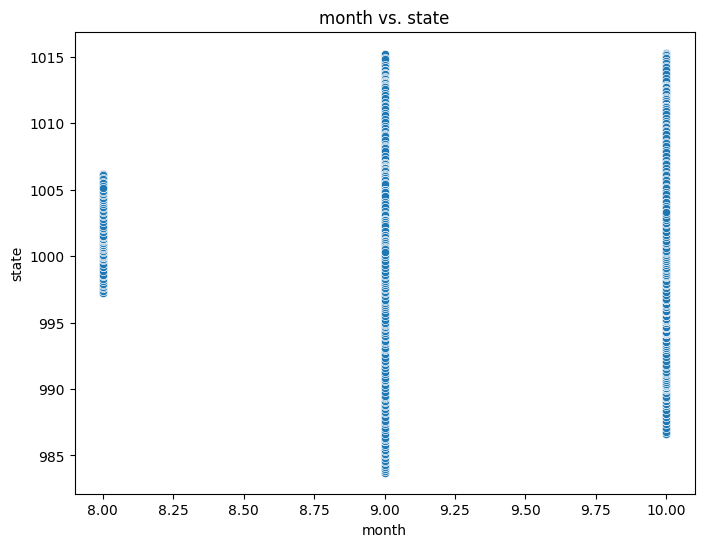

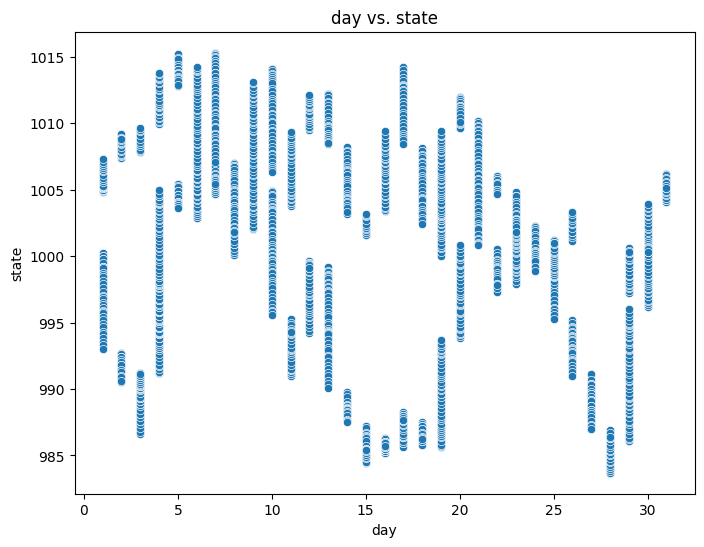

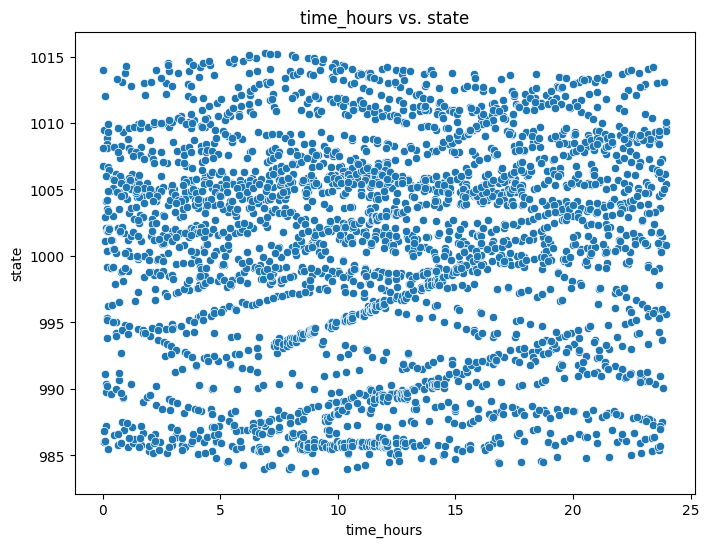


Коррелированные признаки: ['old_state_id', 'month']


In [101]:
df1_cleaned = df1_cleaned.drop(columns=['attributes_id'], errors='ignore')


# Выбираем данные с числовыми признаками
numeric_features = df1_cleaned.select_dtypes(include=['number'])


# 1. Определение шкалы измерения каждого признака.
for column in df1_cleaned.columns:
    dtype = df1_cleaned[column].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        if pd.api.types.is_integer_dtype(dtype):
            print(f"{column} - Шкала измерения: {('Номинальная', 'Порядковая', 'Интервальная', 'Количественная')[pd.api.types.is_categorical_dtype(df1_cleaned[column]) + 2]}")
        else:
            print(f"{column} - Шкала измерения: {'Количественная'}")
    elif pd.api.types.is_object_dtype(dtype):
        print(f"{column} - Шкала измерения: {'Номинальная'}")
    else:
        print(f"{column} - Шкала измерения: {'Неопределенная'}")

# 2. Выявление аномальных значений.
anomalous_values_threshold = 2  # Порог для определения аномалий 
feature = 'state'

anomalous_values = df1_cleaned[feature][abs(df1_cleaned[feature] - df1_cleaned[feature].mean()) > anomalous_values_threshold * df1_cleaned[feature].std()]

if not anomalous_values.empty:
    print(f"Аномальные значения для {feature}:\n{anomalous_values}")
else:
    print(f"Нет аномальных значений для {feature}")


# 3. Визуализация распределения каждого числового признака.
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1_cleaned[feature], kde=True)
    plt.title(f'Визуализация распределения {feature}')
    plt.show()

# 4. Построение корреллограммы для числовых признаков.
correlation_matrix = numeric_features.corr()

# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# 5. Построение совместных распределений числовых признаков с целевой переменной.
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df1_cleaned[feature], y=df1_cleaned['state'])
    plt.title(f'{feature} vs. state')
    plt.show()

# 6. Выявление коррелированных признаков.
correlation_threshold = 0.5
correlation_matrix_upper = np.triu(correlation_matrix, k=1)  # Получаем верхний треугольник

correlated_features = set()

for i, col in enumerate(correlation_matrix.columns):
    correlated_cols = correlation_matrix.columns[np.abs(correlation_matrix_upper[i]) > correlation_threshold]
    correlated_features.update(correlated_cols)

# Вывод информации о коррелированных признаках
print(f'\nКоррелированные признаки: {list(correlated_features)}')